In [1]:
import black
import jupyter_black

jupyter_black.load()

In [93]:
import numpy as np
import openTSNE as TSNE
import matplotlib.pyplot as plt
from dataclasses import dataclass
import importlib
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import pandas as pd
import sklearn.datasets

In [3]:
import utils.Utils as Utils
from utils.Utils import GoodnessOfFit

importlib.reload(Utils)

<module 'utils.Utils' from '/Users/a1/Documents/t-SNE-project/utils/Utils.py'>

In [4]:
# set random seed
np.random.seed(42)
ALPHAS = np.logspace(-0.5, 2, 10)
print(ALPHAS)

[  0.31622777   0.59948425   1.13646367   2.15443469   4.08423865
   7.74263683  14.67799268  27.82559402  52.74997064 100.        ]


In [5]:
tsne_kwargs = {
    "n_iter": 1000,
    "early_exaggeration": 12,
    "learning_rate": 200,
    "n_jobs": -1,
    "random_state": 42,
    "perplexity": 50,
}

## Swiss-roll dataset

## N-samples = 500

In [6]:
n_samples = 500
sr_points, sr_color = Utils.generate_swiss_roll(
    n_samples=n_samples, noise=0.0, plot="plotly", save_fig=True
)

In [7]:
tsne_results_sr500 = []
for α in ALPHAS:
    tsne = TSNE.TSNE(
        perplexity=50,
        n_jobs=-1,
        random_state=42,
        dof=α,
        verbose=True,
    )
    tsne_result = tsne.fit(sr_points)
    tsne_results_sr500.append(tsne_result)

--------------------------------------------------------------------------------
TSNE(dof=0.31622776601683794, early_exaggeration=12, n_jobs=-1, perplexity=50,
     random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 150 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.04 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.03 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.01 seconds
===> Running optimization with exaggeration=12.00, lr=41.67 for 250 iterations...
Iteration   50, KL divergence 2.1977, 50 iterations in 0.6311 sec
Iteration  100, KL divergence 2.2077, 50 iterations in 0.6067 sec
Iteration  150, KL divergence 2.2068, 50 iterations in 0.5914 sec
Iteration  200, KL divergence 2.2068, 50 iterations in 0.5842 sec
Iteration  250, KL divergence 2.2068, 50 iterations in 0.5834 sec
   --> Time elapsed: 3.00 seconds
===> Running

In [93]:
importlib.reload(Utils)

<module 'utils.Utils' from '/Users/a1/Documents/t-SNE-project/utils/Utils.py'>

In [8]:
# fig, ax = plt.subplots(2, 5, figsize=(20, 8))
Utils.plot_TSNE_plotly(
    raw_data=sr_points, tsne_results=tsne_results_sr500, labels=sr_color, alphas=ALPHAS
)

In [10]:
importlib.reload(Utils)
results_sr500 = Utils.compute_goodness_of_fit(
    raw_data=sr_points, tsne_data_list=tsne_results_sr500, dofs=ALPHAS, plot=True
)

## N-samples = 1000

In [11]:
n_samples = 1000
sr_points, sr_color = Utils.generate_swiss_roll(
    n_samples=n_samples, noise=0.0, plot="plotly", save_fig=True
)

In [12]:
tsne_results_sr1000 = []
for α in ALPHAS:
    tsne = TSNE.TSNE(
        perplexity=50,
        n_jobs=-1,
        random_state=42,
        dof=α,
        verbose=True,
    )
    tsne_result = tsne.fit(sr_points)
    tsne_results_sr1000.append(tsne_result)

--------------------------------------------------------------------------------
TSNE(dof=0.31622776601683794, early_exaggeration=12, n_jobs=-1, perplexity=50,
     random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 150 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.17 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.05 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.01 seconds
===> Running optimization with exaggeration=12.00, lr=83.33 for 250 iterations...
Iteration   50, KL divergence 2.7506, 50 iterations in 1.5467 sec
Iteration  100, KL divergence 2.7543, 50 iterations in 1.3364 sec
Iteration  150, KL divergence 2.7544, 50 iterations in 1.3772 sec
Iteration  200, KL divergence 2.7544, 50 iterations in 1.3364 sec
Iteration  250, KL divergence 2.7544, 50 iterations in 1.3444 sec
   --> Time elapsed: 6.94 seconds


In [13]:
importlib.reload(Utils)
Utils.plot_TSNE_plotly(
    raw_data=sr_points,
    tsne_results=tsne_results_sr1000,
    labels=sr_color,
    alphas=ALPHAS,
    display_metrics=True,
)

In [14]:
results_sr1000 = Utils.compute_goodness_of_fit(
    raw_data=sr_points, tsne_data_list=tsne_results_sr1000, dofs=ALPHAS, plot=True
)

### N-samples = 5000

In [178]:
importlib.reload(Utils)

<module 'utils.Utils' from '/Users/a1/Documents/t-SNE-project/utils/Utils.py'>

In [15]:
n_samples = 5000
sr_points, sr_color = Utils.generate_swiss_roll(
    n_samples=5000, noise=0.0, plot="plotly"
)

In [16]:
tsne_results_sr5000 = Utils.compute_tsne_embedding(raw_data=sr_points, alphas=ALPHAS)

Computing the shared affinities...


Computing the PCA initialization...
Computing t-SNE embedding for alpha=0.31622776601683794...


Computing t-SNE embedding for alpha=0.599484250318941...


Computing t-SNE embedding for alpha=1.1364636663857248...


Computing t-SNE embedding for alpha=2.154434690031884...


Computing t-SNE embedding for alpha=4.084238652674522...


Computing t-SNE embedding for alpha=7.742636826811269...


Computing t-SNE embedding for alpha=14.677992676220699...


Computing t-SNE embedding for alpha=27.825594022071257...


Computing t-SNE embedding for alpha=52.749970637026195...


Computing t-SNE embedding for alpha=100.0...


In [17]:
Utils.plot_TSNE_plotly(
    raw_data=sr_points,
    tsne_results=tsne_results_sr5000,
    labels=sr_color,
    alphas=ALPHAS,
    display_metrics=True,
)

In [19]:
results_sr5000 = Utils.compute_goodness_of_fit(
    raw_data=sr_points, tsne_data_list=tsne_results_sr5000, dofs=ALPHAS, plot=True
)

In [49]:
fig = make_subplots(1, 2, subplot_titles=("KL Divergence", "kNN Recall"))

fig.add_trace(
    go.Scatter(
        x=[500, 1000, 5000],
        y=[
            results_sr500.optimal_alpha_KL,
            results_sr1000.optimal_alpha_KL,
            results_sr5000.optimal_alpha_KL,
        ],
        mode="lines+markers",
        name="KL Divergence",
    ),
    row=1,
    col=1,
)
fig.add_trace(
    go.Scatter(
        x=[500, 1000, 5000],
        y=[
            results_sr500.optimal_alpha_kNN_recall,
            results_sr1000.optimal_alpha_kNN_recall,
            results_sr5000.optimal_alpha_kNN_recall,
        ],
        mode="lines+markers",
        name="kNN Recall",
    ),
    row=1,
    col=2,
)

fig.update_xaxes(title_text="Number of Samples", tickvals=[500, 1000, 5000])
fig.update_yaxes(title_text="optimal α value", tickvals=ALPHAS.round(2))

fig.update_layout(
    width=1200,
    height=400,
    title_text="Optimal α value for t-SNE embeddings of the Swiss Roll dataset with different number of samples",
    template="plotly_dark",
)

In [88]:
def get_tsne_results_for_optimal_alpha(tsne_results, results, method):

    if method == "KL":
        optimal_alpha_idx = np.where(results.alphas == results.optimal_alpha_KL)[0][0]
    elif method == "kNN":
        optimal_alpha_idx = np.where(
            results.alphas == results.optimal_alpha_kNN_recall
        )[0][0]
    return tsne_results[optimal_alpha_idx]


chosen_tsnes = [
    tsne_results_sr500[2],
    tsne_results_sr1000[2],
    tsne_results_sr5000[2],
    get_tsne_results_for_optimal_alpha(tsne_results_sr500, results_sr500, "KL"),
    get_tsne_results_for_optimal_alpha(tsne_results_sr1000, results_sr1000, "KL"),
    get_tsne_results_for_optimal_alpha(tsne_results_sr5000, results_sr5000, "KL"),
    tsne_results_sr500[-1],
    tsne_results_sr1000[-1],
    tsne_results_sr5000[-1],
]
chosen_alphas = [
    ALPHAS[2],
    ALPHAS[2],
    ALPHAS[2],
    results_sr500.optimal_alpha_KL,
    results_sr1000.optimal_alpha_KL,
    results_sr5000.optimal_alpha_KL,
    ALPHAS[-1],
    ALPHAS[-1],
    ALPHAS[-1],
]

importlib.reload(Utils)
fig = Utils.plot_TSNE_plotly(
    raw_data=sr_points,
    tsne_results=chosen_tsnes,
    labels=sr_color,
    alphas=chosen_alphas,
    display_metrics=False,
    grid=(3, 3),
    title="Embeddings of the Swiss Roll dataset with different N and α values",
    width=1200,
    height=1200,
    show=False,
)

fig.add_annotation(
    x=0.5,
    y=0.72,
    xref="paper",
    yref="paper",
    text="t-SNE",
    showarrow=False,
    font=dict(size=20),
)

fig.add_annotation(
    x=0.5,
    y=0.35,
    xref="paper",
    yref="paper",
    text="optimal α",
    showarrow=False,
    font=dict(size=20),
)
fig.add_annotation(
    x=0.5,
    y=0,
    xref="paper",
    yref="paper",
    text="SNE",
    showarrow=False,
    font=dict(size=20),
)

## Digits dataset

In [96]:
digits = sklearn.datasets.load_digits(n_class=10)
digit_colors = sns.color_palette("Spectral", as_cmap=True)
X, y = digits.data, digits.target
print(y)
n_samples, n_features = X.shape
n_neighbors = 30

[0 1 2 ... 8 9 8]


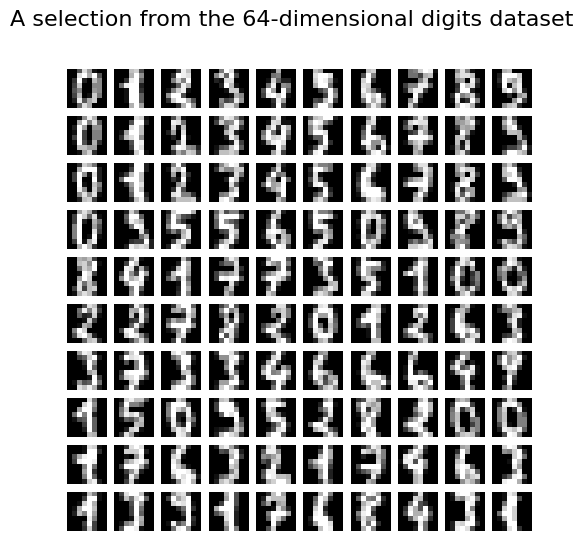

In [97]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap="grey")
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

In [113]:
# X = MinMaxScaler().fit_transform(X)
digits_tsne = TSNE.TSNE(perplexity=30).fit(X)

In [157]:
importlib.reload(Utils)
Utils.plot_TSNE_plotly(
    raw_data=X,
    tsne_results=[digits_tsne],
    labels=y,
    alphas=[1],
    display_metrics=False,
    title="t-SNE embedding of the digits dataset",
    show=False,
    width=6000,
    height=800,
    colorscale="Spectral",
)

In [116]:
# add labels to the embedding
digits_tsne = np.hstack([digits_tsne, y[:, np.newaxis]])
print(digits_tsne)

[[ -4.48574234  58.695598     0.        ]
 [ 13.11239954 -12.63294314   1.        ]
 [-14.57636347 -22.99889933   2.        ]
 ...
 [ -8.09470048  -4.86483376   8.        ]
 [-25.35409348  14.18477719   9.        ]
 [-14.4527337  -10.00386913   8.        ]]


/var/folders/g_/dvk6nf6n4w71vr5_mf4f1zdm0000gn/T/ipykernel_3556/2620526160.py:3: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



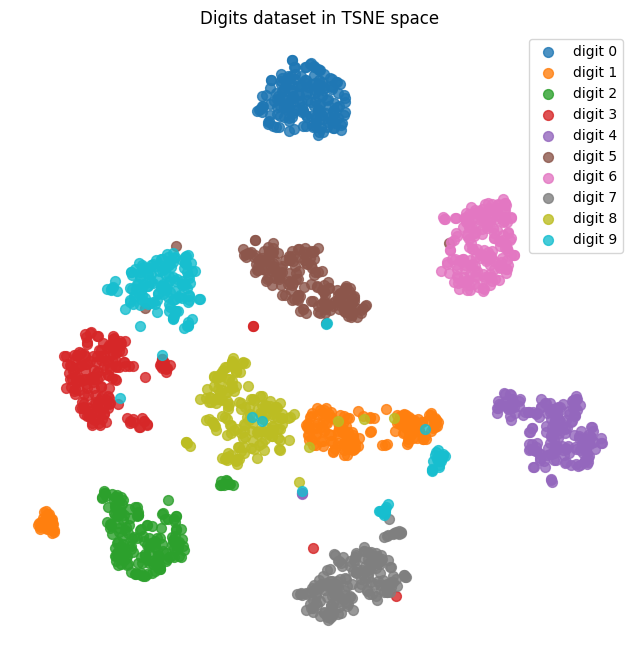

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
for n in range(int(digits_tsne[:, 2].max()) + 1):
    ax.scatter(
        digits_tsne[digits_tsne[:, 2] == n, 0],
        digits_tsne[digits_tsne[:, 2] == n, 1],
        s=50,
        alpha=0.8,
        cmap=digit_colors,
        label=f"digit {n}",
    )
sns.despine(left=True, bottom=True)
ax.set_title("Digits dataset in TSNE space")
ax.set_xticks([])
ax.set_yticks([])
ax.legend()

In [118]:
digit_tsne_results = Utils.compute_tsne_embedding(raw_data=X, alphas=ALPHAS)

Computing the shared affinities...


Computing the PCA initialization...
Computing t-SNE embedding for alpha=0.31622776601683794...


Computing t-SNE embedding for alpha=0.599484250318941...


Computing t-SNE embedding for alpha=1.1364636663857248...


Computing t-SNE embedding for alpha=2.154434690031884...


Computing t-SNE embedding for alpha=4.084238652674522...


Computing t-SNE embedding for alpha=7.742636826811269...


Computing t-SNE embedding for alpha=14.677992676220699...


Computing t-SNE embedding for alpha=27.825594022071257...


Computing t-SNE embedding for alpha=52.749970637026195...


Computing t-SNE embedding for alpha=100.0...


In [131]:
print(y)

[0 1 2 ... 8 9 8]


In [159]:
importlib.reload(Utils)
fig = Utils.plot_TSNE_plotly(
    raw_data=X,
    tsne_results=digit_tsne_results,
    labels=y,
    alphas=ALPHAS,
    display_metrics=True,
    width=1800,
    height=800,
    custom_palette=True,
)

TypeError: 'LinearSegmentedColormap' object is not subscriptable

In [148]:
results_digits = Utils.compute_goodness_of_fit(
    raw_data=X, tsne_data_list=digit_tsne_results, dofs=ALPHAS, plot=True
)